I imported dataset for kickstarter project for period between 2015 and 2015. Link: https://www.kaggle.com/kemical/kickstarter-projects

In [31]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

dataset=pd.read_csv('ks-projects-201801.csv')
dataset=dataset.dropna()
dataset=dataset.set_index('launched')
dataset.index.name = 'Date'
date=pd.to_datetime(dataset.index)
dataset=dataset.drop('ID', axis=1)
dataset=dataset.set_index(date)

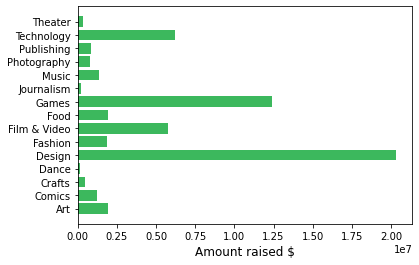

In [32]:
#What category raises most money
raised_by_mcategories=dataset.groupby('main_category')['usd_pledged_real'].aggregate('max')
raised_by_mcategories.index
raised_by_mcategories.values
fig, ax = plt.subplots()
ax.barh(raised_by_mcategories.index,raised_by_mcategories.values, color='#3CB85D')
ax.set_xlabel('Amount raised $', fontsize=12)
plt.show()

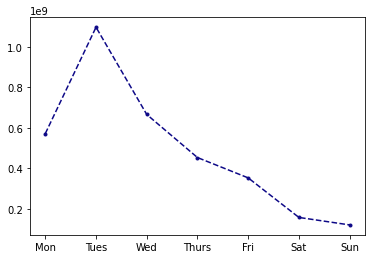

In [33]:
#How much do startups raise if launched in certain days of the week
by_weekday = dataset.groupby(dataset.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday['usd_pledged_real'].plot(style='.--', marker='.', cmap='plasma');

Text(0.5, 0, 'Failure rate')

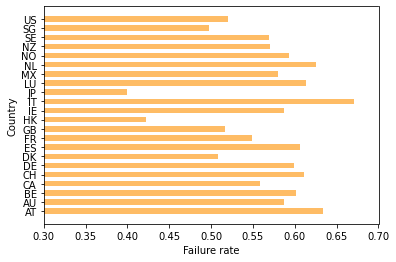

In [34]:
#failure rate for countries
by_gov=dataset.groupby('country').sum()
countries=by_gov.index
countries_fr= []
for country in countries:
    failed=dataset[(dataset['country']==country) & (dataset['state']=='failed')].shape[0]
    overall=dataset[dataset['country']==country].shape[0]
    failure_rate=failed/overall
    countries_fr.append(failure_rate)

plt.barh(countries,countries_fr, height=0.6, align='center', color='#FEBC65')
plt.xlim(0.3, 0.7)
plt.ylabel('Country')
plt.xlabel('Failure rate')

In [18]:
import numpy as np 
all_poss=[]
for i in range(1,7):
    for k in range(1,7):
        value=(i,k)
        all_poss.append(value)
    
all_poss=np.array(all_poss)
count=0
event=0
for comb in all_poss:
    count+=1
    if comb.min()==2:
        event+=1
possibility= event/count
print(possibility)
print(all_poss)

0.25
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]]
2


In [19]:
#combination of dies where y=2: (2 2),(2 3),(2 4),(2 5),(2 6),(3 2),(4 2),(5 2),(6 2)-> overall 9
comb_where_y_is_equal_2=9
all_comb=36
p=comb_where_y_is_equal_2/all_comb
p

0.25